

# 1:https://raw.githubusercontent.com/Premalatha-success/Datasets/refs/heads/main/Telco_Customer_Churn.csv



In [12]:
### Drop->Customer ID
### Dependent Variable-> Churn (Yes,No)-> Classification
### countplot-> DV(To check the possibility of Bias_70% 30%)
### Countplot for all the object type columns
### Boxplot for all the numerical
### Encoding
### Log reg-> Score

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb

In [14]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/refs/heads/main/Telco_Customer_Churn.csv")

In [15]:
df.shape

(7043, 21)

In [16]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
### Drop insignificant column/s
df=df.drop(columns=["customerID"])

In [18]:
df.shape

(7043, 20)

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>, <Axes: >]],
      dtype=object)

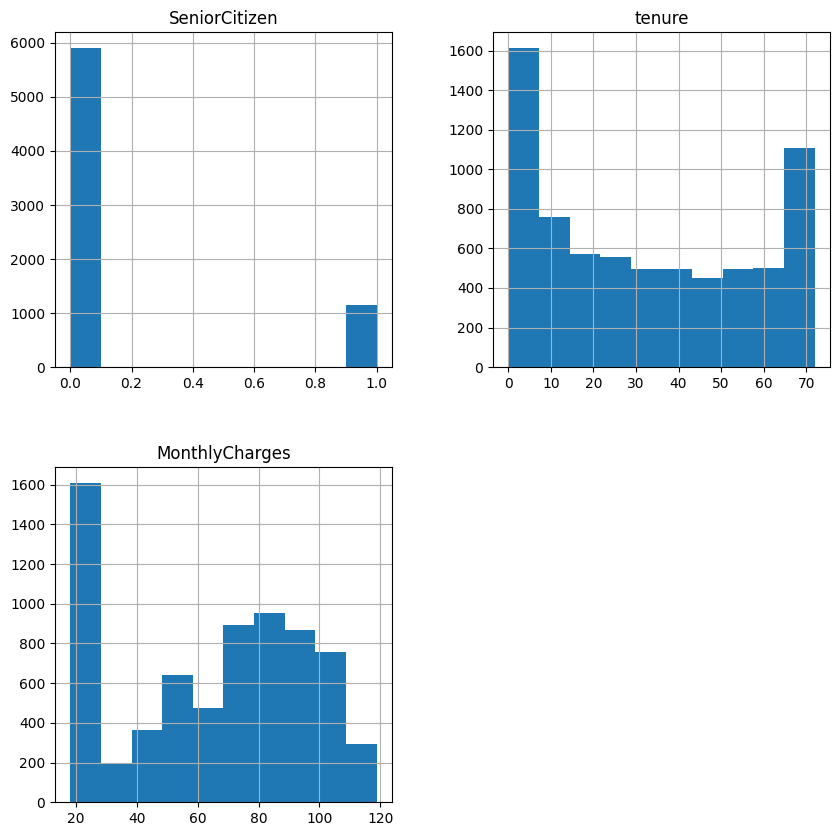

In [19]:
df.hist(figsize=(10,10))

In [20]:
df.skew(numeric_only=True)

,0
SeniorCitizen,1.833633
tenure,0.239540
MonthlyCharges,-0.220524


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


<Axes: xlabel='Dependents', ylabel='count'>

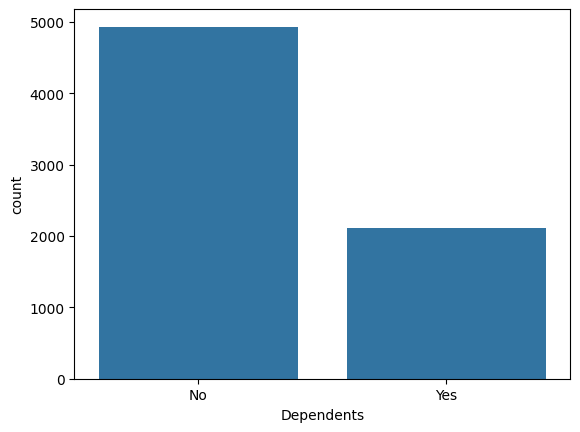

In [22]:
sns.countplot(x="Dependents",data=df)

In [23]:
df["TotalCharges"].value_counts()

,count
TotalCharges,
,11
20.2,11
19.75,9
20.05,8
19.9,8
...,...
130.15,1
3211.9,1
7843.55,1


In [24]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [25]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors="coerce")

In [26]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [27]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [28]:
med_charges=df["TotalCharges"].median()
med_charges

1397.475

In [29]:
mean_charges=df["TotalCharges"].mean()
mean_charges

np.float64(2283.3004408418656)

<Axes: xlabel='TotalCharges'>

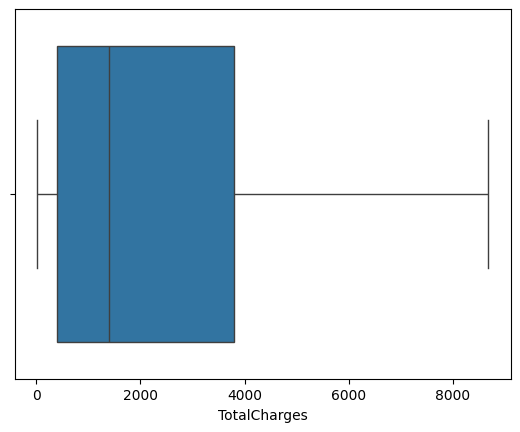

In [30]:
sns.boxplot(x=df["TotalCharges"])

In [31]:
df["TotalCharges"]=df["TotalCharges"].replace(np.nan,mean_charges)

In [32]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [33]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dtype=object)

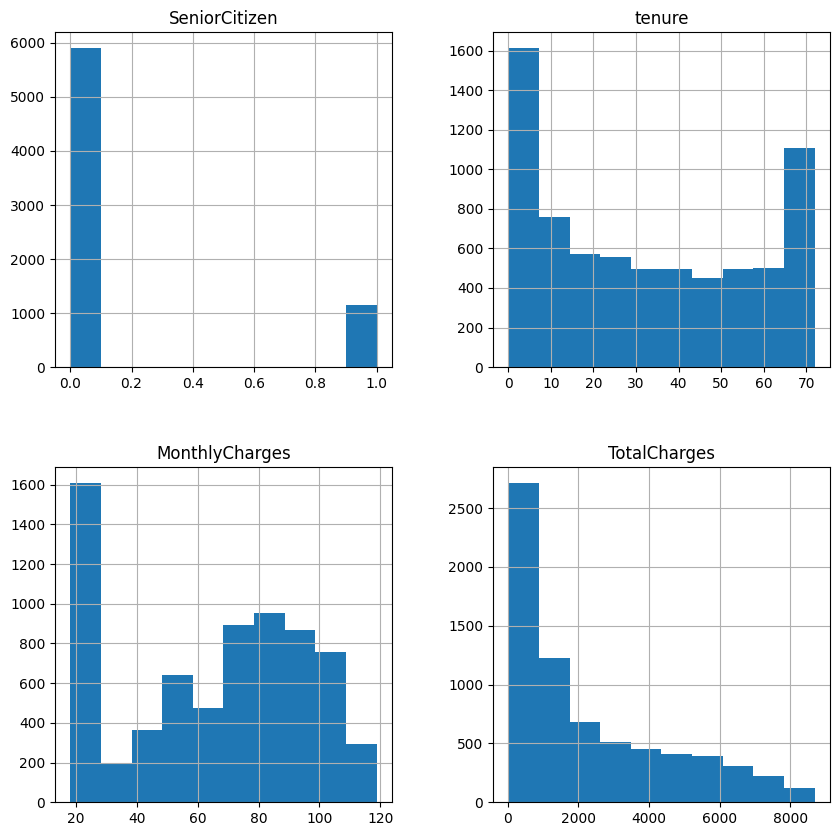

In [34]:
df.hist(figsize=(10,10))

In [35]:
df.skew(numeric_only=True)

,0
SeniorCitizen,1.833633
tenure,0.239540
MonthlyCharges,-0.220524
TotalCharges,0.962394


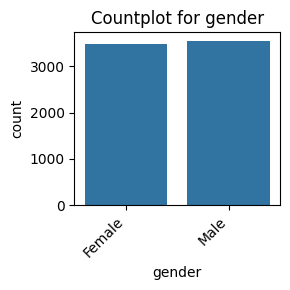

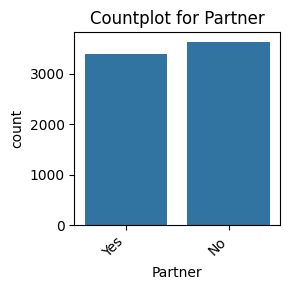

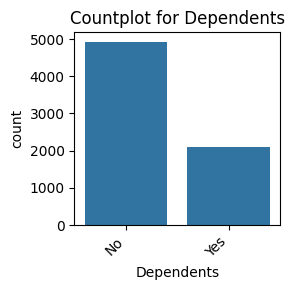

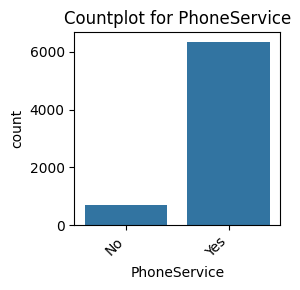

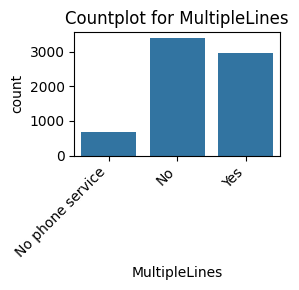

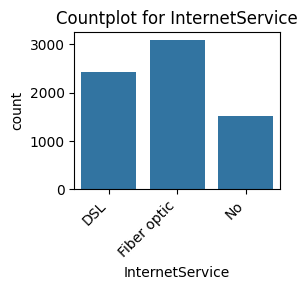

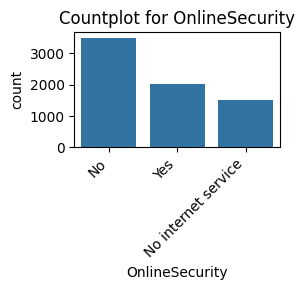

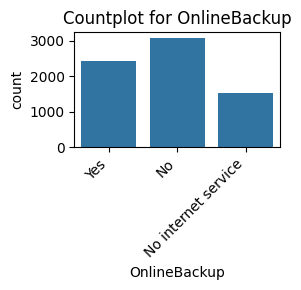

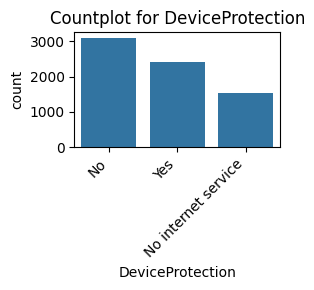

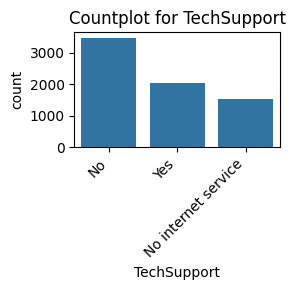

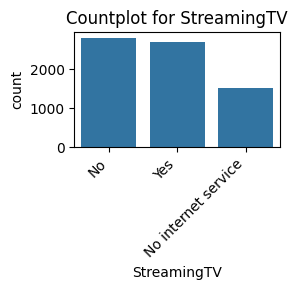

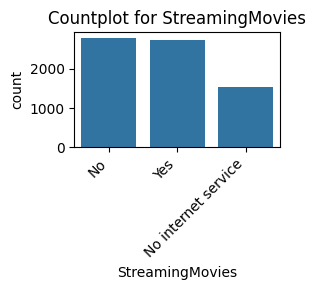

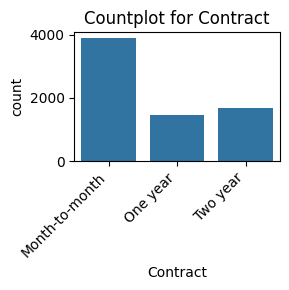

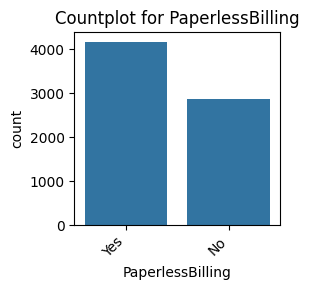

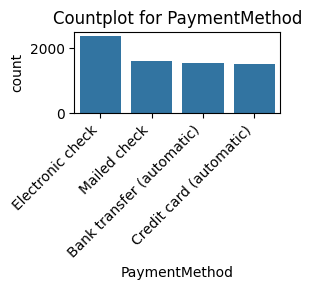

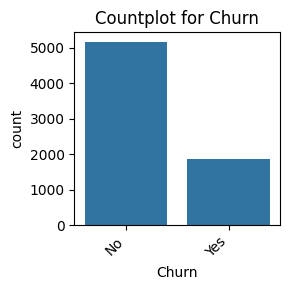

In [37]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(3,3))
    sns.countplot(x=col, data=df)
    plt.title(f'Countplot for {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [38]:
le=LabelEncoder()
for col in df.select_dtypes(include="object").columns:
  df[col]=le.fit_transform(df[col])

In [39]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [40]:
df.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
InternetService,int64
OnlineSecurity,int64
OnlineBackup,int64


In [41]:
Y=df[["Churn"]]
X=df.drop("Churn",axis=1)

In [42]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [43]:
model_lr=LogisticRegression()
model_lr.fit(X_train,Y_train)
model_lr.score(X_train,Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7965517241379311

In [44]:
model_lr.score(X_test,Y_test)

0.8097491717936584

In [48]:
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train,Y_train)
print(model_dt.score(X_train,Y_train))
print(model_dt.score(X_test,Y_test))

0.9977687626774848
0.7193563653573118


In [50]:
model_svm=SVC()
model_svm.fit(X_train,Y_train)
print(model_svm.score(X_train,Y_train))
print(model_svm.score(X_test,Y_test))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7350912778904666
0.7335541883577852


In [51]:
model_knn=KNeighborsClassifier()
model_knn.fit(X_train,Y_train)
print(model_knn.score(X_train,Y_train))
print(model_knn.score(X_test,Y_test))

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8273833671399594
0.7643161381921438


In [52]:
model_bg=BaggingClassifier()
model_bg.fit(X_train,Y_train)
print(model_bg.score(X_train,Y_train))
print(model_bg.score(X_test,Y_test))

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9821501014198782
0.7756743965925225


In [53]:
model_ab=AdaBoostClassifier()
model_ab.fit(X_train,Y_train)
print(model_ab.score(X_train,Y_train))
print(model_ab.score(X_test,Y_test))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8028397565922921
0.8078561287269286


In [56]:
model_gb=GradientBoostingClassifier()
model_gb.fit(X_train,Y_train)
print(model_gb.score(X_train,Y_train))
print(model_gb.score(X_test,Y_test))

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8300202839756592
0.8092759110269758


In [57]:
model_rf=RandomForestClassifier()
model_rf.fit(X_train,Y_train)
print(model_rf.score(X_train,Y_train))
print(model_rf.score(X_test,Y_test))

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9977687626774848
0.7889256980596309


In [ ]:
### Bias

<Axes: xlabel='Churn', ylabel='count'>

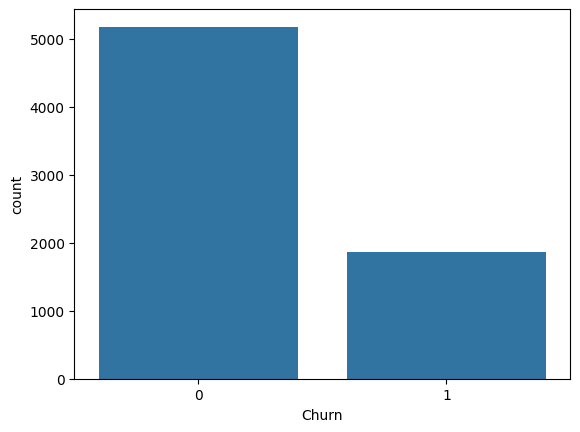

In [58]:
sns.countplot(x="Churn",data=df)